In [1]:
from random_network_models import RandomNetworkModels, StructuralPropertiesRandomNetworks, SpectralPropertiesRandomNetworks
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
from scipy.linalg import eigh
import seaborn as sns


We set the parameter values of the sample networks for visualization and calculation of structural and spectral properties.

In [108]:
# Values of the parameters for the sample network models
p = 0.4
radius = 0.4
alpha = 2
disk_radius = 2
curvature_param = 4
num_nodes = 50
#For the visualization of graph and adjacency matrix
ER = RandomNetworkModels(num_nodes=num_nodes, model ='ER', p=p)
RGG = RandomNetworkModels(num_nodes= num_nodes, model ='RGG', radius=radius)
HRG = RandomNetworkModels(num_nodes= num_nodes, model ='HRG', alpha=alpha, disk_radius=disk_radius, curvature_param=curvature_param)

# For the calculation of structural properties
ER_Struc = StructuralPropertiesRandomNetworks(num_nodes= num_nodes, model ='ER', p=p)
RGG_Struc = StructuralPropertiesRandomNetworks(num_nodes= num_nodes, model ='RGG', radius=radius)
HRG_Struc = StructuralPropertiesRandomNetworks(num_nodes= num_nodes, model ='HRG', alpha=alpha, disk_radius=disk_radius, curvature_param=curvature_param)

# For the calculation of spectral and eigenvector properties
ER_Spec = SpectralPropertiesRandomNetworks(num_nodes= num_nodes, model ='ER', p=p)
RGG_Spec = SpectralPropertiesRandomNetworks(num_nodes= num_nodes, model ='RGG', radius=radius)
HRG_Spec = SpectralPropertiesRandomNetworks(num_nodes= num_nodes, model ='HRG', alpha=alpha, disk_radius=disk_radius, curvature_param=curvature_param)


Now we can create the graphs of the three different models of graphs. Let's visualize!!!

In [109]:
net_ER = ER.generate_network()
net_RGG = RGG.generate_network()
net_HRG = HRG.generate_network()

**First we observe the probabilistic network of Erdös Renyi!!!**<br>
  We show a graph for the parameters: the connection probability $p$ and the number of nodes $n$ given...
then we show the nonzero elements of its binary adjacency matrix...
finally we show the degree distribution of the network.

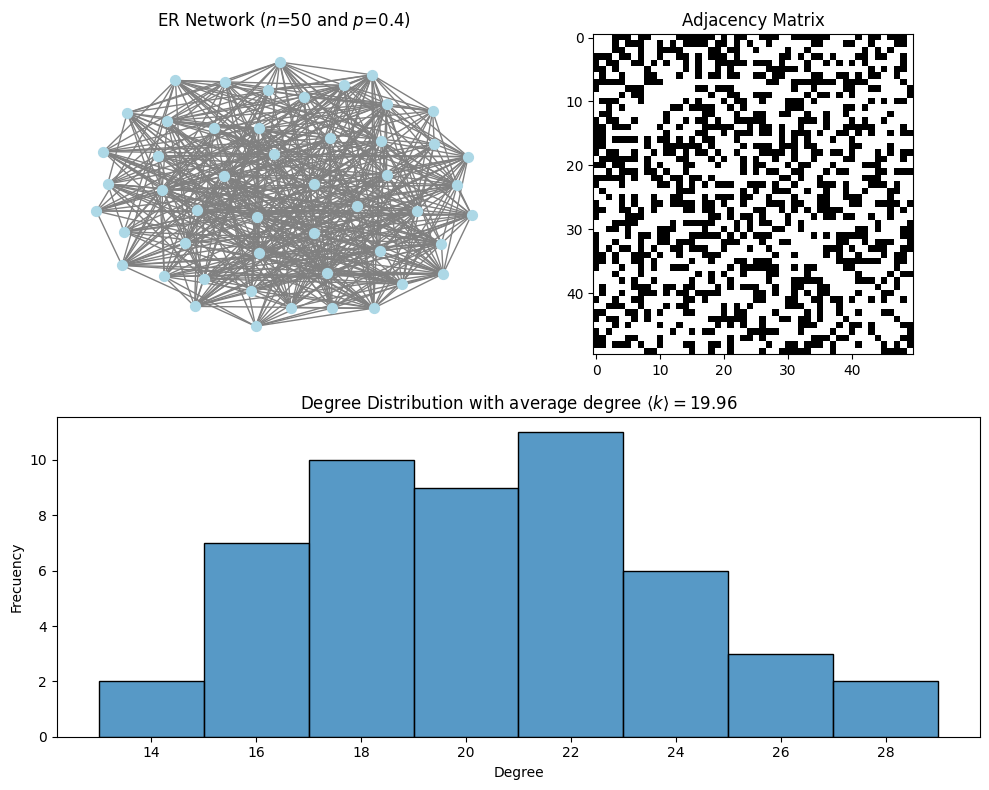

In [110]:
# Create a custom layout using subplot2grid
fig = plt.figure(figsize=(10, 8))

# First row: Two columns
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Row 0, Column 0
ax2 = plt.subplot2grid((2, 2), (0, 1))  # Row 0, Column 1

# Second row: One column spanning the entire width
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)  # Row 1, Column 0-1

# Plot 1: Graph
node_size = 50
ER.visualize_network(net_ER, ax=ax1, node_size=node_size)


# Plot 2: Adjacency Matrix
weighted, binary_adj_matrix = ER.adjacency_matrix_er()
ER.visualize_nonzero_elements(binary_adj_matrix, ax=ax2, cmap_name = "Greys")
ax2.set_title("Adjacency Matrix")

# Plot 3: Degree Distribution
degrees = ER_Struc.degrees_of_the_network(binary_adj_matrix)
sns.histplot(data=degrees, kde=False, ax=ax3, bins = 8)
average_degree = ER_Struc.average_degree(degrees) # Calculate the average degree
ax3.set_title(f"Degree Distribution with average degree $\\langle k\\rangle=${average_degree}")
ax3.set_xlabel("Degree")
ax3.set_ylabel("Frecuency")



# Adjust spacing and display
plt.tight_layout()
plt.show()

The analytical average degree is given by $$\langle k\rangle = (n-1)p \approx np$$, <br> which for this case is:



In [103]:
num_nodes*p

20.0

**Now let's visualize the Random geometric graph in the unit square!!!**

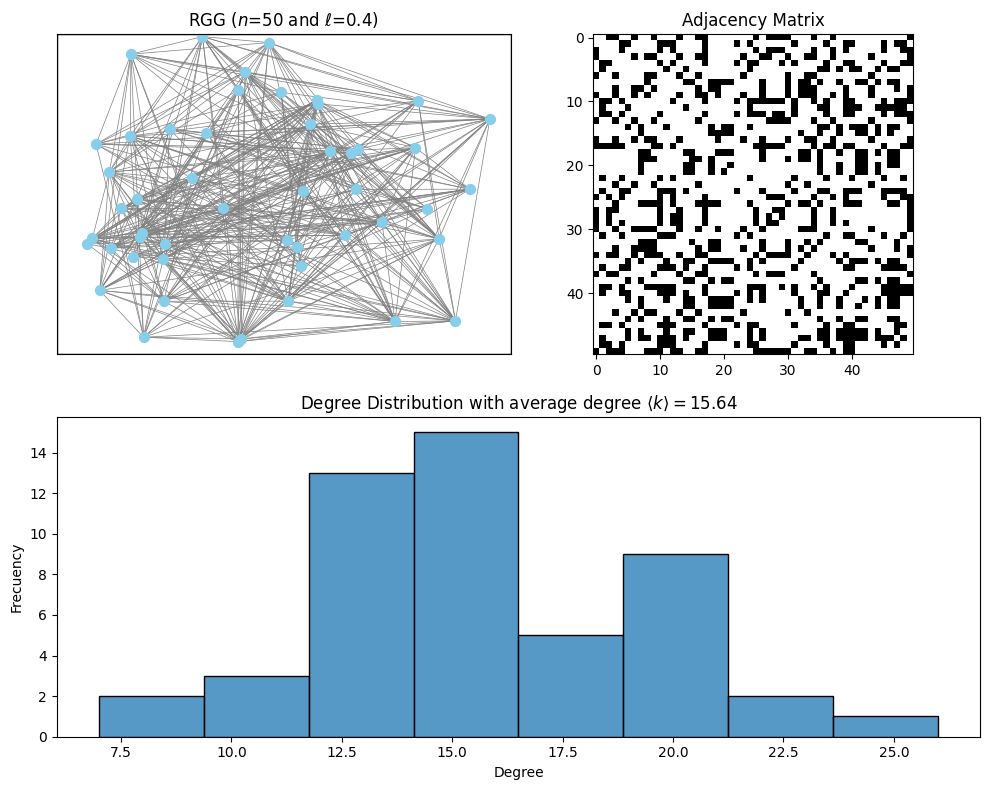

In [111]:
# Create a custom layout using subplot2grid
fig = plt.figure(figsize=(10, 8))

# First row: Two columns
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Row 0, Column 0
ax2 = plt.subplot2grid((2, 2), (0, 1))  # Row 0, Column 1

# Second row: One column spanning the entire width
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)  # Row 1, Column 0-1

# Plot 1: Graph
node_size = 50
RGG.visualize_network(net_RGG, ax=ax1, node_size=node_size)


# Plot 2: Adjacency Matrix
weighted, binary_adj_matrix = RGG.adjacency_matrix_rgg()
RGG.visualize_nonzero_elements(binary_adj_matrix, ax=ax2, cmap_name = "Greys")
ax2.set_title("Adjacency Matrix")

# Plot 3: Degree Distribution
degrees_RGG = RGG_Struc.degrees_of_the_network(binary_adj_matrix)
sns.histplot(data=degrees_RGG, kde=False, ax=ax3, bins = 8)
average_degree_RGG = RGG_Struc.average_degree(degrees_RGG) # Calculate the average degree
ax3.set_title(f"Degree Distribution with average degree $\\langle k\\rangle=${average_degree_RGG}")
ax3.set_xlabel("Degree")
ax3.set_ylabel("Frecuency")



# Adjust spacing and display
plt.tight_layout()
plt.show()

Here, $\ell$ is the radius of connection parameter. <br> Now the analytical expression for the average degree is more complex: 
                                                                                      $$
\frac{\langle k \rangle}{n-1} = 
\begin{cases}
      \pi \ell^{2} - \frac{8}{3}\ell^3 + \frac{1}{2}\ell^{4} &, 0 \leq \ell \leq 1 \\
     \frac{1}{3} - 2 \ell^{2}\left[1 - \arcsin\left(\frac{1}{\ell}\right) + \arccos\left(\frac{1}{\ell}\right) \right] + \frac{4}{3}(2\ell^{2}+1)\sqrt{\ell^{2}-1}-\frac{1}{2}\ell^{4} &, 1 \leq \ell \leq \sqrt{2}
\end{cases}
$$ <br> <a name="reference"></a>
**References**: Penrose, M. (2003). *Random Geometric Graphs*. Oxford University Press.
<a name="reference"></a> <br>
Estrada, E., & Sheerin, M. (2015). Random rectangular graphs. Physical Review E, 91(4), 042805.

Leaving us with a prediction of:

In [112]:
(num_nodes -1)* ( np.pi*(radius**2) - (8/3)*(radius**3) + 0.5*(radius**4) )

16.89461973747731

Of course the numerical result varies!!! It is a random network model and every realization is different, but with the same parameter characteristics.

One important feature of ER and RGG is that as the number of nodes $n\rightarrow \infty$, the degree distribution of ER follows a binomial distribution and for RGG it is binomial-like. <br> 


This fact marks the most important feature of these graphs... a strong homogeneity.
But spatial embedding has its impact...this happens with the famous Hyperbolic random graph. For this graph homogeneity breaks!!!

**Now it's time to visualize the hyperbolic random graph (HRG).**

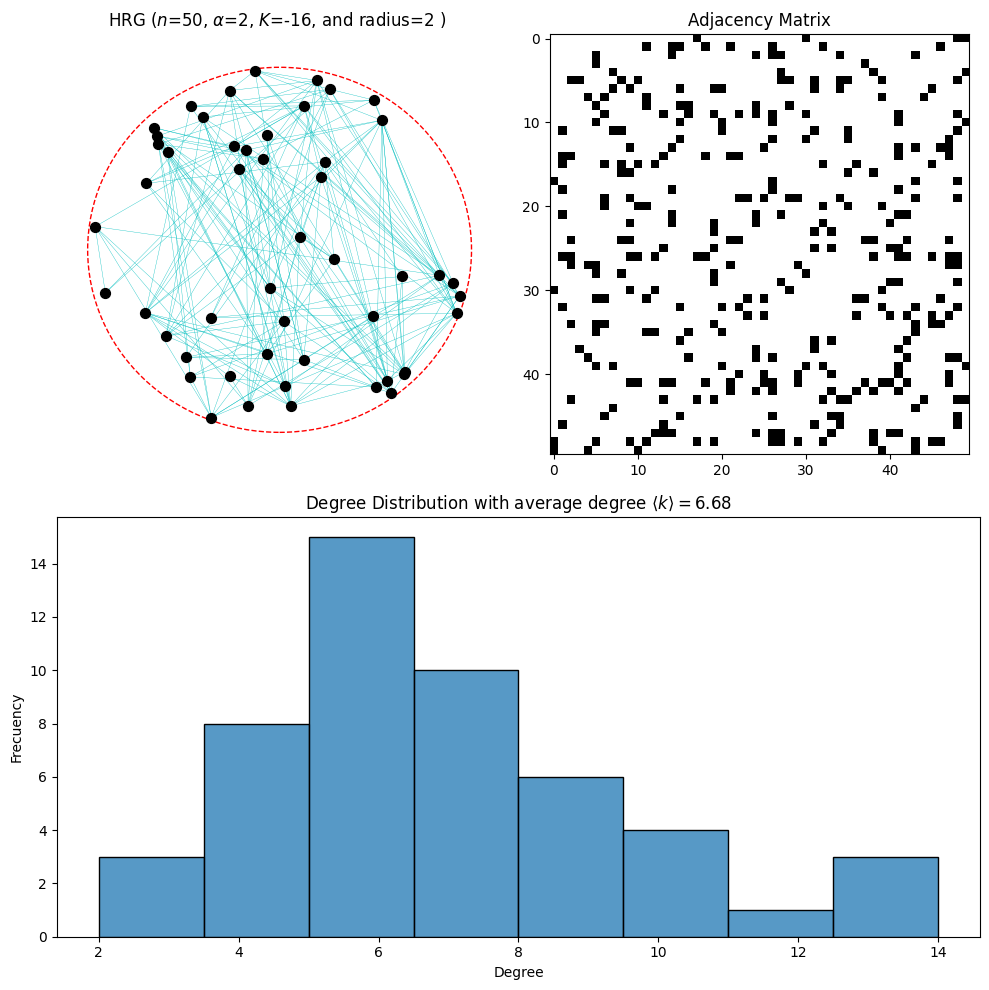

In [119]:
# Create a custom layout using subplot2grid
fig = plt.figure(figsize=(10, 10))

# First row: Two columns
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Row 0, Column 0
ax2 = plt.subplot2grid((2, 2), (0, 1))  # Row 0, Column 1

# Second row: One column spanning the entire width
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)  # Row 1, Column 0-1

# Plot 1: Graph
node_size = 50
HRG.visualize_network(net_HRG, ax=ax1, node_size=node_size)


# Plot 2: Adjacency Matrix
weighted, binary_adj_matrix = HRG.adjacency_matrix_hrg()
#binary_adj_matrix = nx.to_numpy_array(net_HRG)
HRG.visualize_nonzero_elements(binary_adj_matrix, ax=ax2, cmap_name = "Greys")
ax2.set_title("Adjacency Matrix")

# Plot 3: Degree Distribution
degrees_HRG = HRG_Struc.degrees_of_the_network(binary_adj_matrix)
sns.histplot(data=degrees_HRG, kde=False, ax=ax3, bins = 8)
average_degree_HRG = HRG_Struc.average_degree(degrees_HRG) # Calculate the average degree
ax3.set_title(f"Degree Distribution with average degree $\\langle k\\rangle=${average_degree_HRG}")
ax3.set_xlabel("Degree")
ax3.set_ylabel("Frecuency")



# Adjust spacing and display
plt.tight_layout()
plt.show()

Here, $K$ is the gaussian curvature of the embedding space, and $\rho$ is the radius of the hyperbolic disk.

The analytical expression for the average degree is much more complex: <br>
$$\langle k\rangle = \left\lbrace
\begin{array}{ll}
\frac{n\zeta\rho}{2}\left(1+\frac{\zeta\rho}{2\pi}\right)e^{-\zeta\rho/2}, &   \text{if\ } \frac{\alpha}{\zeta}=\frac{1}{2} \\
\frac{2\xi^{2}n}{\pi}\left(e^{-\zeta\rho/2} + e^{-\alpha\rho}\left\lbrace \frac{\alpha\rho}{2}\left[\frac{\pi\zeta^2}{4\alpha^2}\right.\right.\right. &\\ 
\left.\left.\left. -\frac{(\pi-1)\zeta}{\alpha} +\pi-2\right]-1\right\rbrace\right), & \text{if\ }\frac{\alpha}{\zeta}<\frac{1}{2}, \  \frac{\alpha}{\zeta}>\frac{1}{2}\\
\end{array}
\right.$$

The gaussian curvature $K$ is related to $\zeta$ as $K=-\zeta^2$

**References**: Peralta-Martinez K., Méndez-Bermúdez J. A., &  J. M. Sigarreta. (2025). Hyperbolic random geometric graphs: Structural and spectral properties.
Phys. Rev. E 111, 024309. [https://journals.aps.org/pre/abstract/10.1103/PhysRevE.111.024309](URL)
<a name="reference"></a> <br>
Krioukov D., Papadopoulos F., Kitsak M., Vahdat A., &
Boguñá M., (2010). Phys. Rev. E 82, 036106.

In this case, the expected average degree is:

In [120]:
aver = (num_nodes*curvature_param*disk_radius/2)* (1 + (curvature_param*disk_radius)/(2*np.pi) )* ( np.exp(-curvature_param*disk_radius/2) )
print(aver)

8.327166921791946


Heterogeneity appears, because the degree distribution tends to a power law. Of course a larger graph may be be required to observe all this effect at almost every realization. This power-law degree distribution is further explained in the **references** above.